## Time Series Modeling with Prophet

### Released by Facebook in 2017, forecasting tool Prophet is designed for analyzing time-series that display patterns on different time scales such as yearly, weekly and daily. It also has advanced capabilities for modeling the effects of holidays on a time-series and implementing custom changepoints. Therefore, we are using Prophet to get a model up and running.

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
import xlrd
df = pd.read_csv("Data/Registrants.csv")

In [3]:
df.shape

(239766, 4)

In [4]:
df.head()

,REGDATE,P_CLIENTCODE,Client ID,REGISTRANTS
0,1-Jan-15,AAP,2218.0,12
1,2-Jan-15,AAP,2218.0,14
2,3-Jan-15,AAP,2218.0,9
3,4-Jan-15,AAP,2218.0,6
4,5-Jan-15,AAP,2218.0,11


In [5]:
# List the unique values in the ['P_CLIENTCODE column']
# Shows the unique number of clients
df.P_CLIENTCODE.nunique()

451

In [6]:
# We need to convert 'REGDATE' from an object to time series
df.dtypes

REGDATE          object
P_CLIENTCODE     object
Client ID       float64
REGISTRANTS       int64
dtype: object

In [7]:
# Convert 'REGDATE'from an object to time series
df['REGDATE'] = pd.to_datetime(df['REGDATE'])

In [8]:
# Confirm that the object was changed. 
df.dtypes

REGDATE         datetime64[ns]
P_CLIENTCODE            object
Client ID              float64
REGISTRANTS              int64
dtype: object

In [9]:
# Determine the minimum and maximum dates of 'REGDATE'
df['REGDATE'].min(), df['REGDATE'].max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2019-10-07 00:00:00'))

In [10]:
df.shape

(239766, 4)

In [11]:
# Make a cols variable to remove columns that we do not need
cols = ['P_CLIENTCODE','Client ID']

In [12]:
df.drop(cols, axis=1, inplace=True)

In [13]:
df = df.sort_values('REGDATE')

In [14]:
# Determine if we have any null values
df.isnull().sum()

REGDATE        0
REGISTRANTS    0
dtype: int64

In [15]:
df = df.groupby('REGDATE')['REGISTRANTS'].sum().reset_index()

In [16]:
df.head()

,REGDATE,REGISTRANTS
0,2015-01-01,244
1,2015-01-02,354
2,2015-01-03,259
3,2015-01-04,228
4,2015-01-05,346


In [17]:
df.columns = ['ds', 'y']

In [18]:
df.head()

,ds,y
0,2015-01-01,244
1,2015-01-02,354
2,2015-01-03,259
3,2015-01-04,228
4,2015-01-05,346


In [19]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

In [20]:
df.head()

,ds,y
0,2015-01-01,244
1,2015-01-02,354
2,2015-01-03,259
3,2015-01-04,228
4,2015-01-05,346


In [21]:
prediction_size = 30
train_df = df[:-prediction_size]

In [22]:
m = Prophet()
m.fit(train_df)
future = m.make_future_dataframe(periods=prediction_size)
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,609.923023,250.719534,788.321380,609.923023,609.923023,-97.189142,-97.189142,-97.189142,103.872435,103.872435,103.872435,-201.061577,-201.061577,-201.061577,0.0,0.0,0.0,512.733881
1,2015-01-02,610.055250,170.171877,701.652592,610.055250,610.055250,-197.107986,-197.107986,-197.107986,21.991312,21.991312,21.991312,-219.099298,-219.099298,-219.099298,0.0,0.0,0.0,412.947263
2,2015-01-03,610.187477,-67.504193,465.538995,610.187477,610.187477,-410.988269,-410.988269,-410.988269,-175.455480,-175.455480,-175.455480,-235.532789,-235.532789,-235.532789,0.0,0.0,0.0,199.199208
3,2015-01-04,610.319704,-116.865700,385.131588,610.319704,610.319704,-477.656347,-477.656347,-477.656347,-227.340727,-227.340727,-227.340727,-250.315620,-250.315620,-250.315620,0.0,0.0,0.0,132.663357
4,2015-01-05,610.451931,127.020195,637.454138,610.451931,610.451931,-228.223030,-228.223030,-228.223030,35.184590,35.184590,35.184590,-263.407620,-263.407620,-263.407620,0.0,0.0,0.0,382.228900


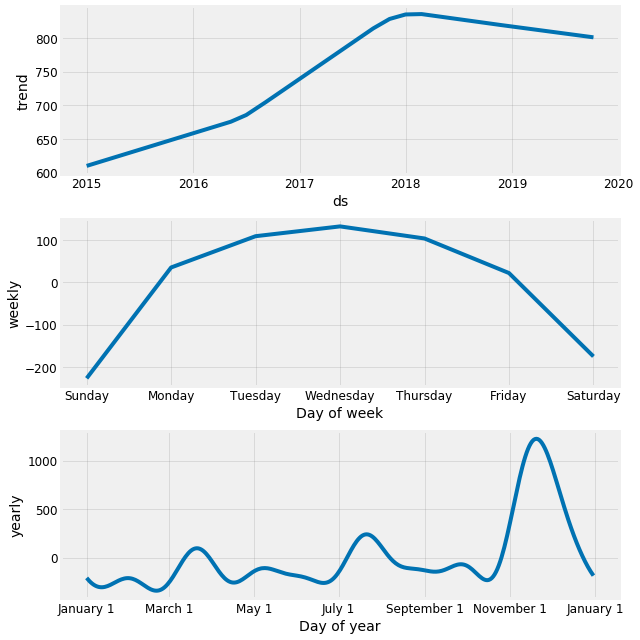

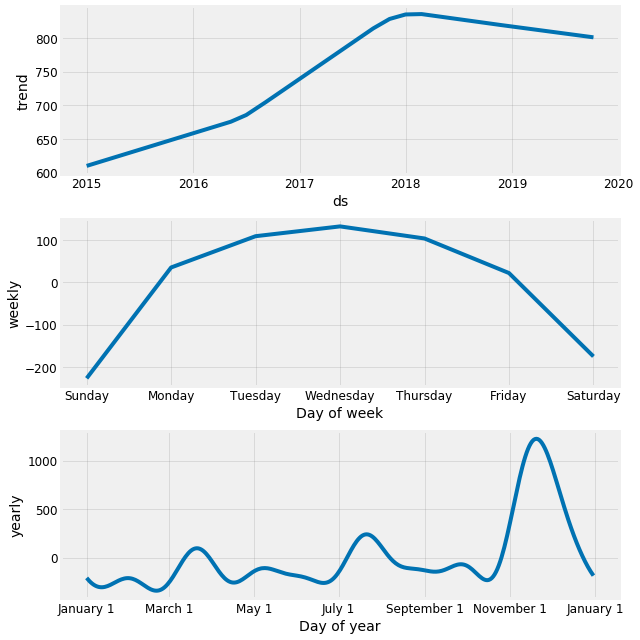

In [23]:
m.plot_components(forecast)